In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils, plot_help


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
                            roc_curve, roc_auc_score, precision_recall_curve

from joblib import dump, load

%matplotlib inline

In [2]:
#change read limit to -1 to load entire dataframe
df_bus = utils.chunk_loader('data/cleaned/business_merge_feats.csv', read_limit=-1)

df_bus = df_bus.drop(columns=['latitude', 'longitude', 'postal_code'])



#make dataframe of numeric types
df_num = df_bus.select_dtypes(include=[np.float64, np.int64]).copy()

#copy over from notebook
drop_col_loc = [25, 26, 27, 50, 62, 69, 70, 72, 73, 74, 75, 76, 88, 98]

df_num = df_num.drop(df_num.columns[drop_col_loc], axis=1)

In [3]:
X_train, X_test, y_train, y_test = utils.train_test_scale (df_num, 
                                                           'is_open', 
                                                           random_state=None)

In [4]:
best_params = {'learning_rate': 0.1, 
               'loss': 'deviance', 
               'max_features': None, 
               'min_samples_leaf': 32, 
               'min_samples_split': 4, 
               'n_estimators': 300, 
               'subsample': 0.1}

print(best_params)

{'learning_rate': 0.1, 'loss': 'deviance', 'max_features': None, 'min_samples_leaf': 32, 'min_samples_split': 4, 'n_estimators': 300, 'subsample': 0.1}


## Undersampling

In [5]:
#apply undersampling
X_under, y_under = utils.undersample(X_train, y_train)

#check mean dist
y_under.mean()

0.5

In [6]:
#instantiate gb tree regression
gbt_under = GradientBoostingClassifier(learning_rate=0.1, 
               loss='deviance', 
               max_features=None, 
               min_samples_leaf=32, 
               min_samples_split=4, 
               n_estimators=300, 
               subsample=0.1)

#check params
print(gbt_under.get_params)

gbt_under.fit(X_under, y_under)

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=32, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=32, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

           0       0.38      0.69      0.49      6072
           1       0.91      0.73      0.81     26160

    accuracy                           0.73     32232
   macro avg       0.64      0.71      0.65     32232
weighted avg       0.81      0.73      0.75     32232

----------
Normalized confusion matrix


/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


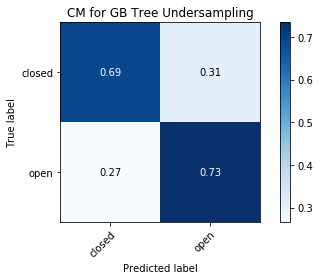

----------


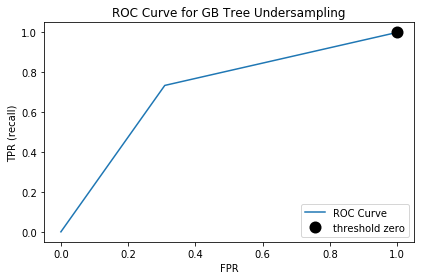

Area Under Curve = 0.7126
----------


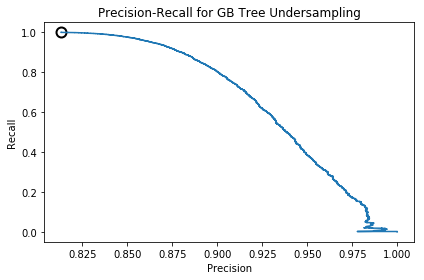

In [7]:
#make pred with undersampling
y_pred_under = gbt_under.predict(X_test)

print(classification_report(y_test, y_pred_under))
print(10*'-')
plot_help.plot_confusion_matrix(y_test, y_pred_under, ['closed', 'open'], normalize=True,
                                title='GB Tree Undersampling')
print(10*'-')
plot_help.plot_roc_curve(y_test, y_pred_under, 'GB Tree Undersampling')
print(10*'-')
plot_help.plot_prc_curve(y_test, gbt_under.predict_proba(X_test)[:, 1], 'GB Tree Undersampling')

## Oversample

In [8]:
#apply undersampling
X_over, y_over = utils.oversample(X_train, y_train)

#check mean 
y_over.mean()

0.44714800950378614

In [9]:
#instantiate gb tree regression
gbt_over = GradientBoostingClassifier(learning_rate=0.1, 
               loss='deviance', 
               max_features=None, 
               min_samples_leaf=32, 
               min_samples_split=4, 
               n_estimators=300, 
               subsample=0.1)


gbt_over.fit(X_over, y_over)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=32, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

           0       0.35      0.75      0.48      6072
           1       0.92      0.67      0.78     26160

    accuracy                           0.69     32232
   macro avg       0.64      0.71      0.63     32232
weighted avg       0.81      0.69      0.72     32232

----------
Normalized confusion matrix


/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


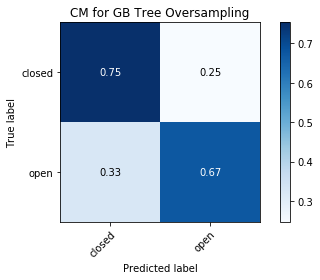

----------


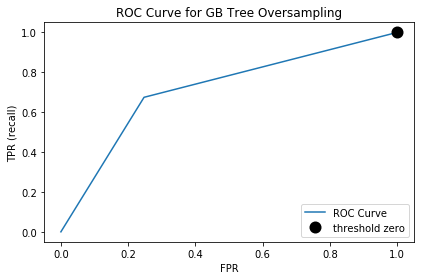

Area Under Curve = 0.7136
----------


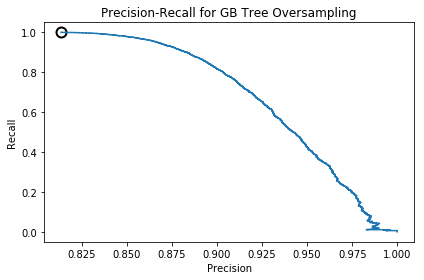

In [10]:
#make pred with undersampling
y_pred_over = gbt_over.predict(X_test)

print(classification_report(y_test, y_pred_over))
print(10*'-')
plot_help.plot_confusion_matrix(y_test, y_pred_over, ['closed', 'open'], normalize=True,
                                title='GB Tree Oversampling')
print(10*'-')
plot_help.plot_roc_curve(y_test, 
                         y_pred_over, 
                         'GB Tree Oversampling')
print(10*'-')
plot_help.plot_prc_curve(y_test, 
                         gbt_over.predict_proba(X_test)[:, 1], 
                         'GB Tree Oversampling')